In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
import catboost as cb

In [2]:
# --- Cargar el DataFrame desde el archivo CSV ---
data= pd.read_csv('../data/data_imputed/data_processed_newdata2.csv')

In [3]:
'''
Seleccionamos todas las filas de 'data' donde el valor de la columna 'x_e_out [-]' no es nulo, y lo almacenamos en un nuevo dataframe 'y_no_null'.
'''
no_null = data[data['x_e_out [-]'].notnull()]
no_null.reset_index(drop=True, inplace=True)
no_null= no_null.drop('id', axis=1)

'''
Seleccionamos todas las filas de 'data' donde el valor de la columna 'x_e_out [-]' es nulo, y lo almacenamos en un nuevo dataframe 'target_null'.
'''
null = data[data['x_e_out [-]'].isnull()]
null.reset_index(drop=True, inplace=True)

In [4]:
# Creamos una copia del DataFrame original
no_null = no_null.copy()

In [5]:
# Variables independientes
X = no_null.drop('x_e_out [-]', axis=1)
# Variable dependiente
y = no_null['x_e_out [-]']

import re 
# Preprocess column names
X.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in X.columns]
X.columns

import re 
# Preprocess column names
y = pd.DataFrame(y)
y.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in y.columns]
y.columns

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Definimos los modelos con los mejores hiperparámetros
xgb_model = xgb.XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=7, min_data_in_leaf=10, n_estimators=100, subsample=0.8)
lgb_model = lgb.LGBMRegressor(n_estimators=462, max_depth=8, num_leaves=8, learning_rate=0.09307365282770512, min_child_samples=17, reg_alpha=0.007517979097813751, reg_lambda=7.539307360631893, force_col_wise=False)
catboost_model = cb.CatBoostRegressor(depth=4, learning_rate=0.1119422098928344, l2_leaf_reg=0.4985501174669087, random_strength=0.07988380994191854, bagging_temperature=0.139837561570809, iterations=310)
rf_model = RandomForestRegressor(max_depth=8, n_estimators=300, random_state=42)
gb_model = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

In [9]:
# Creamos el ensemble de modelos
ensemble = VotingRegressor([('xgb', xgb_model), ('lgb', lgb_model), ('catboost', catboost_model), ('rf', rf_model), ('gb', gb_model)])

In [10]:
# Entrenamos el ensemble con los datos de entrenamiento
ensemble.fit(X_train, y_train)

c:\Users\albac\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[01:09:27] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_data_in_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0:	learn: 0.0975589	total: 138ms	remaining: 42.7s
1:	learn: 0.0947072	total: 141ms	remaining: 21.7s
2:	learn: 0.0923642	total: 144ms	remaining: 14.7s
3:	learn: 0.0904278	total: 147ms	remaining: 11.2s
4:	learn: 0.0887313	total: 149ms	remaining: 9.11s
5:	learn: 0.0873584	total: 152ms	remaining: 7.7s
6:	learn: 0.0861662	total: 155ms	remaining: 6.71s
7:	learn: 0.0852405	total: 158ms	remaining: 5.96s
8:	learn: 0.0843773	total: 161ms	remaining: 5.39s
9:	learn: 0.0836976	total: 165ms	remaining: 4.94s
10:	learn: 0.0830846	total: 167ms	remaining: 4.55s
11:	learn: 0.0825154	tota

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.6,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          ma...
                                           max_depth=8, min_child_samples=17,
                  

In [11]:
# Realizar predicciones con el ensemble
y_pred = ensemble.predict(X_test)

In [12]:
# Calcular el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimir el RMSE
print("RMSE:", rmse)

RMSE: 0.07461457766979783


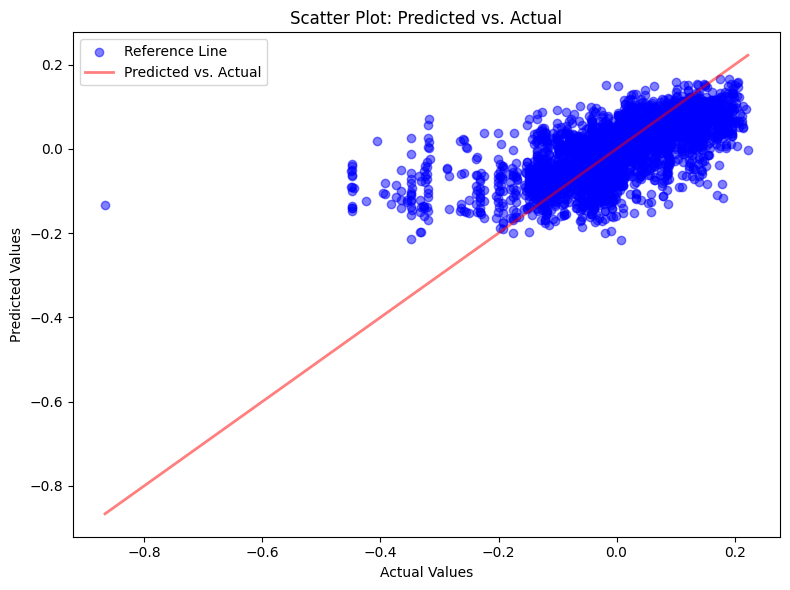

In [13]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming importance_xgb contains the feature importances from the XGB model
# Assuming preds contains the predictions from the XGB model

# Scatter plot of actual values vs predicted values
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus necesidades
plt.scatter(y_test, y_pred, color='blue', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', alpha=0.5, linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs. Actual')
plt.legend(['Reference Line', 'Predicted vs. Actual'])

plt.tight_layout()
plt.show()

### 📤 Submission

In [19]:
x_df_null = null.drop('x_e_out [-]', axis=1)
x_df_null = x_df_null.drop(columns=["id"])
y_df_null = null['x_e_out [-]']
x_df_null = x_df_null.rename(columns={'pressure [MPa]': 'pressure_MPa_', 'mass_flux [kg/m2-s]': 'mass_flux_kg/m2-s_',
                                      'D_e [mm]': 'D_e_mm_', 'D_h [mm]' : 'D_h_mm_', 'length [mm]': 'length_mm_',
                                      'chf_exp [MW/m2]': 'chf_exp_MW/m2_'})

# Realizar predicciones para los datos imputados
y_pred1 = ensemble.predict(x_df_null)
# Predicciones en la columna objetivo (y)
null['x_e_out [-]'] = y_pred1
# Guardar los datos en un archivo para la competición de Kaggle
null.to_csv("../submissions/ensemble.csv", index=False)


# Leer el archivo CSV
ensemble = pd.read_csv("../submissions/ensemble.csv")
# Mantener solo las columnas "id" y "x_e_out [mm]"
columnas_deseadas = ["id", "x_e_out [-]"]
ensemble = ensemble[columnas_deseadas]
# Guardar el DataFrame resultante en un nuevo archivo CSV
ensemble.to_csv("../submissions/ensemble_sub.csv", index=False)

c:\Users\albac\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
